Simulated brand survey data consisting of 10 brands and 100 respondents. Ratings scale from 1 to 10, with 10 being the best.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('survey.csv')
df.head()

,perform,leader,latest,fun,serious,bargain,value,trendy,rebuy,brand
0,2,4,8,8,2,9,7,4,6,a
1,1,1,4,7,1,1,1,2,2,a
2,2,3,5,9,2,9,5,1,6,a
3,1,6,10,8,3,4,5,2,1,a
4,1,1,5,8,1,9,9,1,1,a


In [3]:
from sklearn.preprocessing import scale, minmax_scale
from sklearn.decomposition import PCA

In [4]:
df_scaled = df.copy()
df_scaled.iloc[:, :-1] = scale(df_scaled.iloc[:, :-1])

In [5]:
df_scaled_grouped = df_scaled.groupby('brand').mean()

In [6]:
pca = PCA(2).fit(df_scaled_grouped)
print(f"Combined variance proportion of the two principal components: {pca.explained_variance_ratio_.sum()}")

Combined variance proportion of the two principal components: 0.843899869924366


In [7]:
pc1_scores = pca.transform(df_scaled_grouped)[:, 0]
pc2_scores = pca.transform(df_scaled_grouped)[:, 1]

# Transform scores to the same scale as PC loadings
pc1_scores_scaled = minmax_scale(pc1_scores, (-1, 1))
pc2_scores_scaled = minmax_scale(pc2_scores, (-1, 1))

In [8]:
features = df.columns[:-1]
loadings = pca.components_
pd.DataFrame(pca.components_, columns=pca.feature_names_in_, index=['PC_1', 'PC_2']).T

,PC_1,PC_2
perform,0.242842,0.355730
leader,0.194459,0.466359
latest,-0.378300,0.213428
fun,-0.254358,-0.313819
serious,0.183280,0.547858
bargain,0.338824,-0.203422
value,0.439990,-0.201468
trendy,-0.350602,0.359983
rebuy,0.480102,0.015020


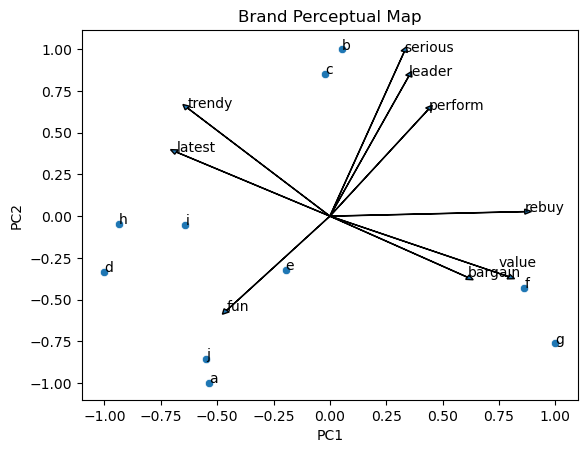

In [9]:
sns.scatterplot(x=pc1_scores_scaled, y=pc2_scores_scaled)
for i, brand in enumerate(df.brand.unique()):
    plt.text(x=pc1_scores_scaled[i], y=pc2_scores_scaled[i], s=brand)
for i, feature in enumerate(features):
    plt.arrow(0, 0, loadings[0, i] * 1.8, 
              loadings[1, i] * 1.8, 
              head_width=0.03, 
              head_length=0.03)
    if feature == "value":
        plt.text(loadings[0, i] * 1.7, 
                 loadings[1, i] * 1.5, 
                 feature, fontsize = 10)
    else:
        plt.text(loadings[0, i] * 1.8, 
                 loadings[1, i] * 1.8, 
                 feature, fontsize = 10)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Brand Perceptual Map');